# Problem 1

## Part 1 
### Generate points

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
from IPython.core.interactiveshell import InteractiveShell
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

InteractiveShell.ast_node_interactivity = "all"
%matplotlib notebook

#http://sebastianraschka.com/Articles/2014_python_lda.html#introduction

In [25]:
# Define variables

mu_1 = np.zeros(3)
mu_2 = np.array([0, 0, 1])
cov_1 = np.array([[1, 0.9, 0.9],[0.9, 1, 0.9], [0.9, 0.9, 1]])
cov_2 = np.array([[1, 0.8, 0.8], [0.8, 1, 0.8], [0.8, 0.8, 1]])
#cov_1
#cov_2

# Sample the two vectors of Gaussians
label_1 = np.random.multivariate_normal(mean=mu_1, cov=cov_1, size=20)
label_2 = np.random.multivariate_normal(mean=mu_2, cov=cov_2, size=20)

# Use these copies if you need to access the original labels
label_1_copy = label_1.copy()
label_2_copy = label_2.copy()

# Make X_train and y_train
X_train = np.concatenate((label_1_copy, label_2_copy), axis=0)
y_train = np.concatenate((np.zeros(label_1.shape[0]), np.ones(label_2.shape[0])))

<IPython.core.display.Javascript object>


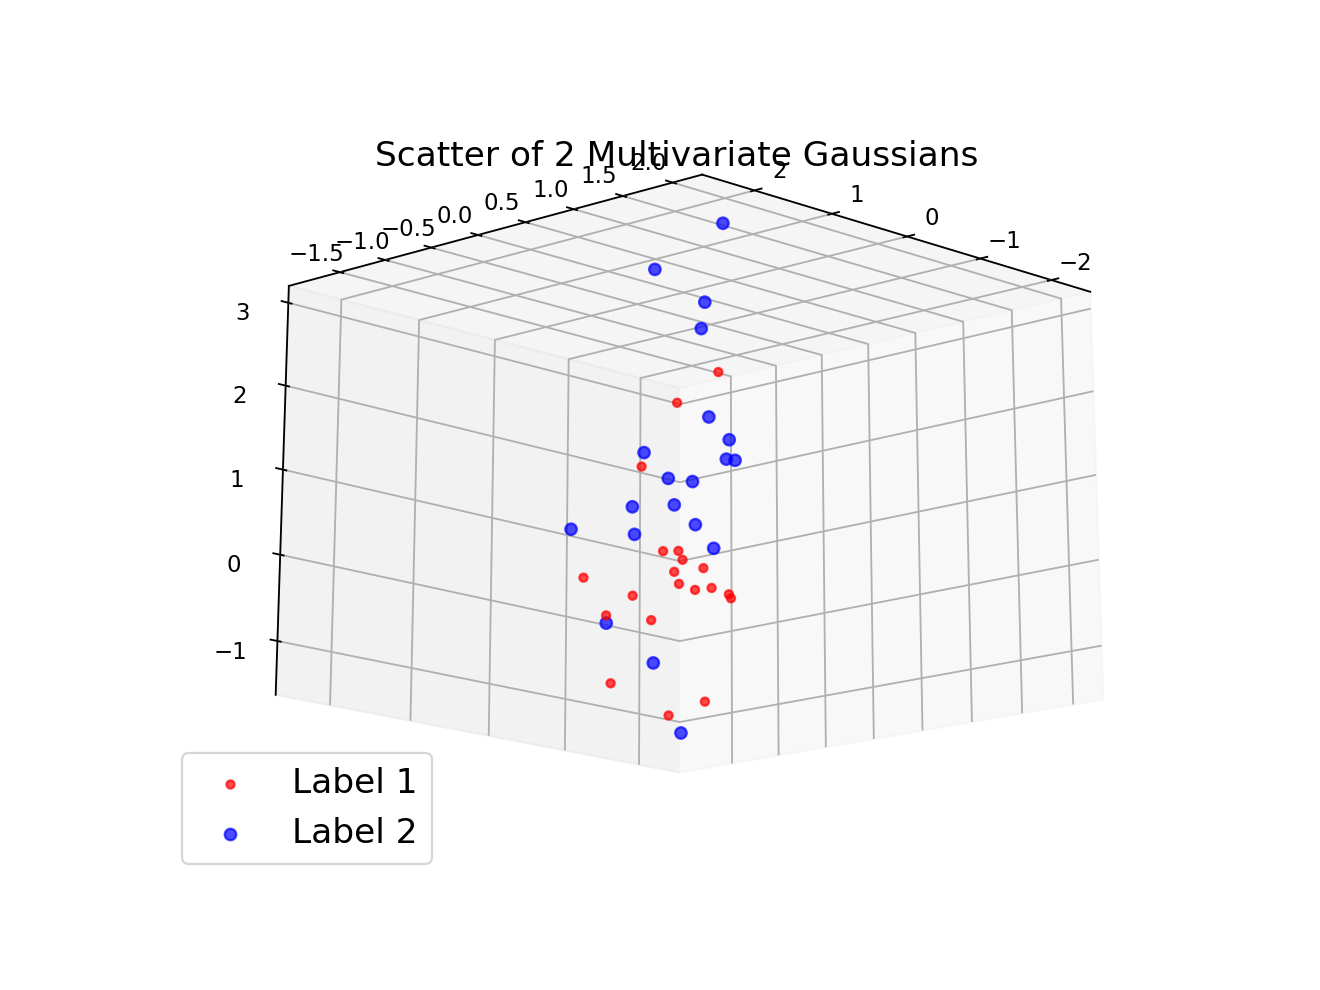

In [15]:
# MATLAB plotting > Python plotting

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(label_1[:,0], label_1[:,1], label_1[:,2], 
                alpha=0.7, s=50, color = 'red', marker='.', label="Label 1")
_ = ax.scatter(label_2[:,0], label_2[:,1], label_2[:,2], 
                alpha=0.7, s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians', FontSize=15)
_ = plt.legend(loc=3, prop={'size' : 15})
for ii in range(0,360,1):
        _ = ax.view_init(elev=10., azim=ii)

## Part 2 
### Perform a projection of the data on one dimension using Fischer's Linear Discriminant

## Part 3

### Perform LDA with sklearn

In [32]:
# Make LDA, fit it, and get transformed X
lda = LinearDiscriminantAnalysis()
_ = lda.fit(X_train, y_train)
X_new = lda.transform(X_train)

<IPython.core.display.Javascript object>


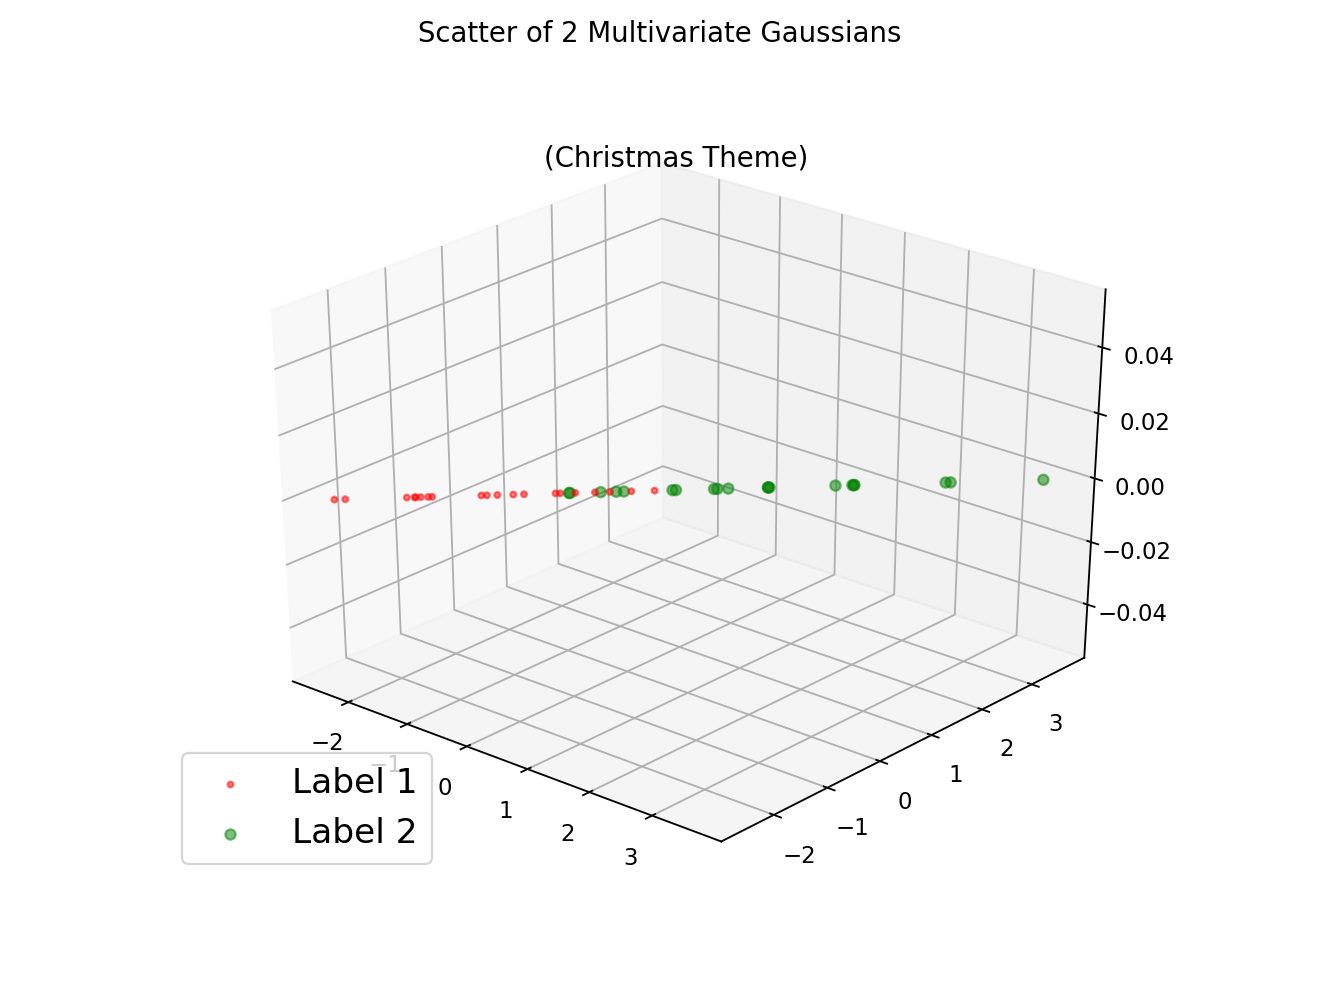

In [42]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(X_new[:20], X_new[:20], alpha=0.5, s=25, color='red', 
               marker='.', label="Label 1")
_ = ax.scatter(X_new[20:], X_new[20:], alpha=0.5, s=20, color='green', 
               marker='o', label="Label 2")

_ = plt.suptitle('Scatter of 2 Multivariate Gaussians', FontSize=15)
_ = plt.title('(Christmas Theme)')
_ = plt.legend(loc=3, prop={'size' : 15})
for ii in range(0,360,1):
        _ = ax.view_init(elev=10., azim=ii)